In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
(df == -1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
df = df.replace(-1,np.NaN)

In [7]:
for col in ['carbo','sugars','potass']:
    df[col] = df[col].fillna(df[col].mean())

In [8]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [9]:
df.drop('name',axis=1,inplace=True)
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [10]:
df['type'] = df['type'].apply(lambda x: 1 if x=='H' else 0)
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,Q,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,K,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,K,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,R,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [11]:
dummy = pd.get_dummies(df['mfr'],dtype=int)
df = pd.concat([df,dummy],axis=1)
df.drop('mfr',axis=1,inplace=True)
df

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,weight,cups,rating,A,G,K,N,P,Q,R
0,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,...,1.0,0.75,34.384843,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,110,2,1,250,0.0,21.0,3.0,60.000000,25,...,1.0,0.75,39.106174,0,1,0,0,0,0,0
73,0,110,1,1,140,0.0,13.0,12.0,25.000000,25,...,1.0,1.00,27.753301,0,1,0,0,0,0,0
74,0,100,3,1,230,3.0,17.0,3.0,115.000000,25,...,1.0,0.67,49.787445,0,0,0,0,0,0,1
75,0,100,3,1,200,3.0,17.0,3.0,110.000000,25,...,1.0,1.00,51.592193,0,1,0,0,0,0,0


In [12]:
y = df['rating']
X = df.drop('rating',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
lr.score(X_test,y_test)

0.9937115873051551

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
mean_absolute_error(y_test,lr.predict(X_test))

0.8270110494934209

In [19]:
mean_squared_error(y_test,lr.predict(X_test))

1.381283001227861

<Axes: ylabel='Count'>

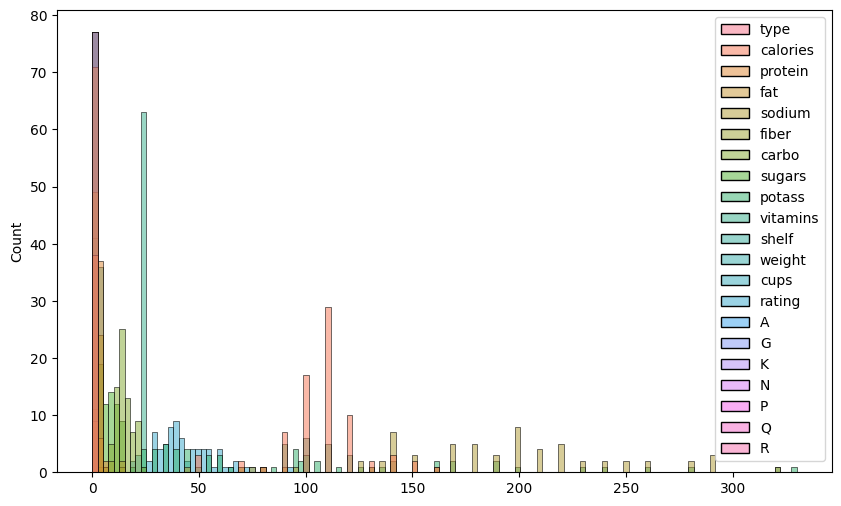

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df)